Report:

Plot training and test error rates against K. Explain what you observe. Is it consistent with
what you expect from the class? What is the optimal value of K? What are the training and test error rates associated with the
optimal K? Draw a plot of the training data that also shows the decision boundary for the optimal K.
Comment on what you observe. Does the decision boundary seem sensible?

a) Modeling/Training: 
The modeling process begins with seperating the features from the label and the transforming/encoding the string response variable(y) from the testing and training data to be a binary output instead. Then , the model iterates through the KNN Model imported from sklearn and fitted on the training/testing data. Per iteration, it is calculating the error depending of the accuracy of the predicted test/training error with the actual data of the testing/training data. 

b) Plotting Error:
The plot shows the training to begin at 0 and the testing error to be ~.23. We see after several iterations and several   different observed errors with different K values, the testing error decreased and the training error slightly increase. Both the testing and training error converge to a general range of marginal difference for error. This range seemed to be that the testing and training error were consitently between .18 and .19. This is typical behavior from a KNN model where with lower k values, we tend to observe very low training error and relatively high testing error. Across more training in which the k increases, we tend to observe a decreasing testing error and an increase training error. However, eventually at some value these will converge where the testing error will reach an optimal minimized error and the testing and training error appear to be similar, not quite identitical from that point forward. 

c) Optimal Value: K=64, Testing Error = .178, Training Error = .179
Using the argmin function from numpy, we observed that the optimal K value was 64. Note, I added +1 because the model was training on K between 1 and 100. List indexing begins at 0 hence why I added the plus 1.

d) The decision boundary appears to be effective at seperating the data. The issue is not with the boundary itself but rather arises from the fact that several data points actually lie extremely close to the boundary itself. So it does seem like some values are going on the wrong side of the boundary however this is to be expected to some degree as larger data sets will have variance in data and will tend to have data points scattered. So overall, the boundary does seem sensible.





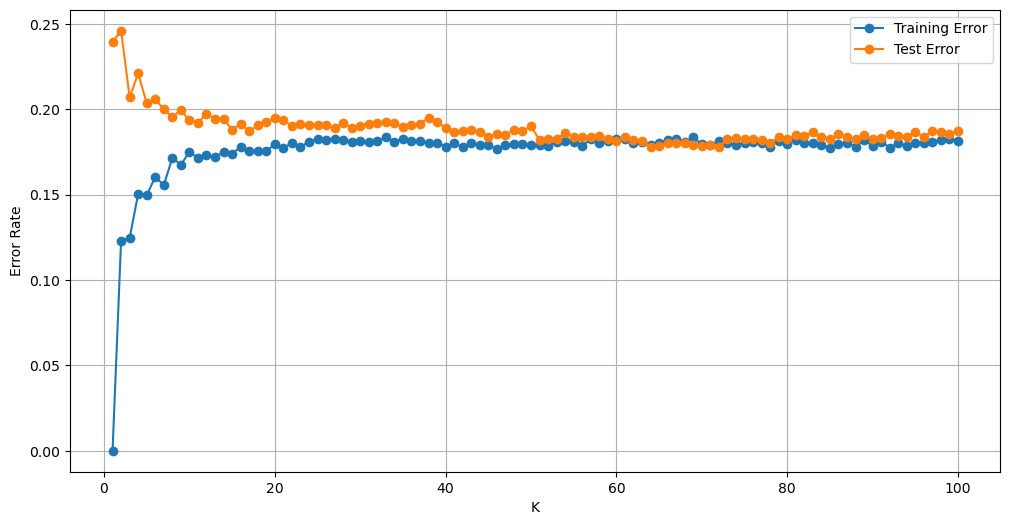

Optimal K: 64
Training Error for Optimal K: 0.179
Test Error for Optimal K: 0.178


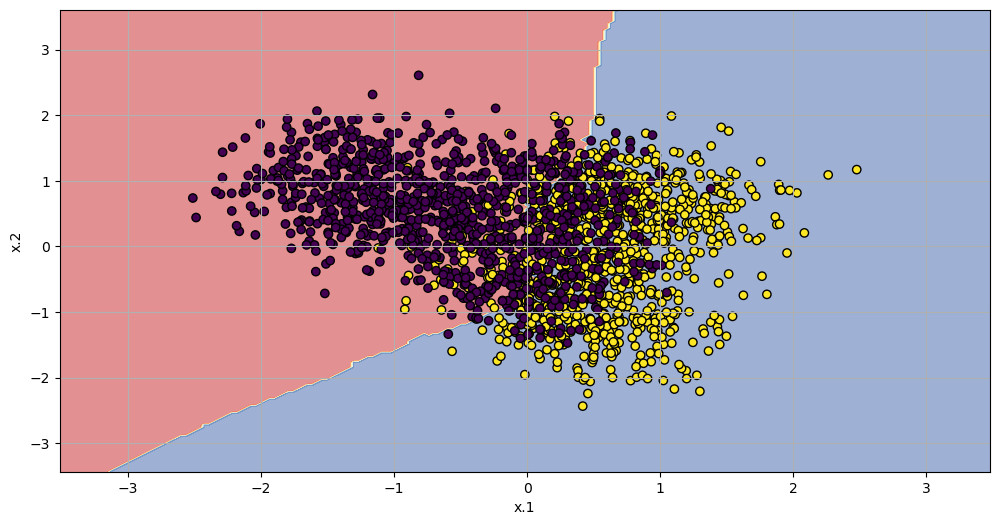

In [7]:
#Part a: Fitting KNN with K between 1,2,...100

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Load the data
train_data = pd.read_csv('1-training_data.csv')
test_data = pd.read_csv('1-test_data.csv')

# Separate features and labels
X_train = train_data.iloc[:,0:2] # Getting first 2 colummns 
y_train = train_data.iloc[:,2]   # Getting the 'Y' Column
X_test = test_data.iloc[:,0:2]   # Getting first 2 colummns 
y_test = test_data.iloc[:,2]     # Getting the 'Y' Column

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train) #Y is a string value, encoding it so it can be used later on as a binary
y_test = label_encoder.transform(y_test)       #Same thing here but with the testing data instead now

# Lists to store error rates
train_errors = []
test_errors = []

#Training model from K 1-100
k_values = range(1, 101)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)    #Making the KNN Model
    knn.fit(X_train, y_train)                    #Fitting the model with training data
    
    #training error
    y_train_pred = knn.predict(X_train) 
    train_error = 1 - accuracy_score(y_train, y_train_pred) #Probability training y is NOT predicted correctly so the error
    train_errors.append(train_error) 
    
    #test error
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred) #Probability testing y is NOT predicted correctly so the error
    test_errors.append(test_error)

# Part B: Plotting the error rates
plt.figure(figsize=(12, 6)) 
plt.plot(k_values, train_errors, label='Training Error', marker='o') #plotting training erorr
plt.plot(k_values, test_errors, label='Test Error', marker='o') #plotting testing error
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend() 
plt.grid(True)
plt.show()

#Part C: Finding the optimal values

optimal_K = np.argmin(test_errors) + 1 #K ran from 1-100 so + 1
optimal_train_error = train_errors[optimal_K - 1]  #Meanwhile lists begin index from 0 hence - 1
optimal_test_error = test_errors[optimal_K - 1]

print("Optimal K: " + str(optimal_K))
print("Training Error for Optimal K: " + str(round(optimal_train_error,10)))
print("Test Error for Optimal K: " + str(round(optimal_test_error,10)))

#Part D: Creating Decision Boundaries:

#Slicing Errow while indexing, this helps to produce arrays instead when needed
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_test = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

#Fitting the model with optimal knn value (64)
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_K) #64 from before
knn_optimal.fit(X_train, y_train)

# Generates a grid of spaced points using linspace function. Decision Boundary was too large with 50 instead of 200
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200), #min/max from x.1
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200)) #min/max from x.2

# Using the knn model to evaluate 
Z = knn_optimal.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel to convert to array to lower dimension
Z = Z.reshape(xx.shape) 

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu) #grid map with decision boundary too
plt.scatter(X_train[:, 0], X_train[:, 1], c=[y_train], edgecolor = 'k') #plotting actual values
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.grid(True)
plt.show()

In [74]:
from IPython.display import display, Math

latex = r"""
\text{2a:}\\
\text{Proof For :} \text{MSE}\{\hat{f}(x_0)\} = \text{Bias}^2\{\hat{f}(x_0)\} + \text{Var}\{\hat{f}(x_0)\} \\
\\
\text{Definition of MSE:} \\
\text{MSE}\{\hat{f}(x_0)\} = \mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)^2\right] \\
\\
\text{Next Step is to decompose the term so we can foil it out:} \\
\left(\hat{f}(x_0) - f(x_0)\right)^2 = \left(\hat{f}(x_0) - \mathbb{E}[\hat{f}(x_0)] +
\mathbb{E}[\hat{f}(x_0)] - f(x_0)\right)^2 \\
\\
\text{Foiling and Expanding the term:} \\
= \left(\hat{f}(x_0) - \mathbb{E}[\hat{f}(x_0)]\right)^2 + 2\left(\hat{f}(x_0) - 
\mathbb{E}[\hat{f}(x_0)]\right)\left(\mathbb{E}[\hat{f}(x_0)] - f(x_0)\right) + \left(\mathbb{E}[\hat{f}(x_0)] - 
f(x_0)\right)^2 \\
\\
\text{Expectation of both sides from the definition of MSE} \\
\mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)^2\right] = \mathbb{E}\left[\left(\hat{f}(x_0) - 
\mathbb{E}[\hat{f}(x_0)]\right)^2\right] + \left(\mathbb{E}[\hat{f}(x_0)] - f(x_0)\right)^2 \\
\\
\text{Next:} \\
\mathbb{E}\left[\left(\hat{f}(x_0) - \mathbb{E}[\hat{f}(x_0)]\right)^2\right] = \text{Var}\{\hat{f}(x_0)\} \text{ and } 
\left(\mathbb{E}[\hat{f}(x_0)] - f(x_0)\right)^2 = \text{Bias}^2\{\hat{f}(x_0)\} \\
\\
\text{Hence:} \\
\text{MSE}\{\hat{f}(x_0)\} = \text{Bias}^2\{\hat{f}(x_0)\} + \text{Var}\{\hat{f}(x_0)\}
"""

# Display the proof using LaTeX
display(Math(latex))

<IPython.core.display.Math object>

In [76]:
from IPython.display import display, Math

# Define the LaTeX proof with line breaks
latex_proof = r"""
\text{2b:}\\
\text{Proof for:} \\
\mathbb{E}\left[\left(\hat{Y}_0 - Y_0\right)^2\right] = \text{Bias}^2\{\hat{f}(x_0)\} + \text{Var}\{\hat{f}(x_0)\} + \sigma^2 \\
\\
\text{Definition of Y and Predicted Y:} \\
Y_0 = f(x_0) + \epsilon_0 \text{ and }\hat{Y}_0 = \hat{f}(x_0) \\
\\
\text{So:} \\
\hat{Y}_0 - Y_0 = \hat{f}(x_0) - f(x_0) - \epsilon_0 \\
\\
\text{Squared Diff:} \\
\left(\hat{Y}_0 - Y_0\right)^2 = \left(\hat{f}(x_0) - f(x_0) - \epsilon_0\right)^2 \\
\\
\text{Expanding:} \\
= \left(\hat{f}(x_0) - f(x_0)\right)^2 - 2\left(\hat{f}(x_0) - f(x_0)\right)\epsilon_0 + \epsilon_0^2 \\
\\
\text{Expectation from Definition:} \\
\mathbb{E}\left[\left(\hat{Y}_0 - Y_0\right)^2\right] = \mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)^2\right]
- 2\mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)\epsilon_0\right] + \mathbb{E}\left[\epsilon_0^2\right] \\
\\
\mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)\epsilon_0\right] = 0 \text{ because } 
\epsilon_0 \text{ is independent of } \hat{f}(x_0)) 
\text{ so we know the whole term must be 0 }, \\
\\
\text{This simplifies to:} \\
\mathbb{E}\left[\left(\hat{Y}_0 - Y_0\right)^2\right] = \mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)^2\right] +
\mathbb{E}\left[\epsilon_0^2\right] \\
\\
\text{From previous part, we know:} \\
\mathbb{E}\left[\left(\hat{f}(x_0) - f(x_0)\right)^2\right] = \text{Bias}^2\{\hat{f}(x_0)\} + \text{Var}\{\hat{f}(x_0)\} \\
\\
\text{And since we know that this term } \mathbb{E}\left[\epsilon_0^2\right] = \sigma^2, \text{ we can conclude:} \\
\mathbb{E}\left[\left(\hat{Y}_0 - Y_0\right)^2\right] = \text{Bias}^2\{\hat{f}(x_0)\} + \text{Var}\{\hat{f}(x_0)\} + 
\sigma^2 \\
"""

# Display the proof using LaTeX
display(Math(latex_proof))

<IPython.core.display.Math object>